# Importar librerias

In [1]:
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from sklearn.metrics import confusion_matrix

# Mel-frequency cepstral coefficient
For obtaining the feature vector from the audio file, we will use the mel-frequency cepstral coefficients [(MFCC).](https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html), and for  obtain this  mel-frequency from an audio, we will use the librosa [library](https://librosa.org/doc/latest/index.html).

----

The following code shows how to load an audio file with librosa and how to play it.

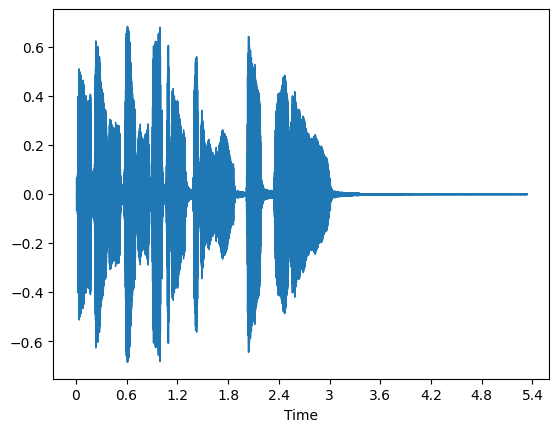

In [2]:
import librosa
import matplotlib.pylab as plt

from IPython.display import Audio
y, sr = librosa.load(librosa.ex('trumpet'))

librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

# Feacture Vector

To obtain the feature vector, we divide the signal into windows. We will have a total of 20 windows, and from each window, we will extract 230 mel coefficients. We then calculate the average of the coefficients from each window, resulting in a 20-dimensional vector for each audio signal. This vector is the characteristic vector that represents an audio signal.

You and your team can vary the way in which the feature vector is obtained. For example, instead of just taking the average of each window, we could take statistical measures such as the mean, maximum value, minimum value, and standard deviation for each window. These values from all the windows could then be combined into a larger characteristic vecto.

----

The following code shows how to obtein the characteristics vector of an audio using mel coefficients.


In [3]:
y, sr = librosa.load(librosa.ex('trumpet'))
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print("Each windows is represented by a 230-dimensional vector, and the audio has been divided into 20 windows" ,  mfccs.shape)
print("If we calculate the mean of the coefficients from each of the 20 windows, we will obtain a single 20-dimensional vector. This is the characteristic vector of the audio signal ")
feacture_vector = mfccs.mean(axis = 1)
print(feacture_vector)
print("Vector dimension: " , feacture_vector.shape)

Audio(data=y, rate=sr)

Each windows is represented by a 230-dimensional vector, and the audio has been divided into 20 windows (20, 230)
If we calculate the mean of the coefficients from each of the 20 windows, we will obtain a single 20-dimensional vector. This is the characteristic vector of the audio signal 
[-4.4225790e+02  5.0383911e+01 -7.0578911e+01 -1.8441647e+01
 -1.6287895e+01 -1.8831705e+01 -2.1320690e+01 -1.3630634e+01
 -2.0642900e+01 -1.2660918e+01 -9.4624453e+00 -4.9655886e+00
  3.9786601e-01  4.6334152e+00  4.7938638e+00  4.0112081e+00
  5.0261869e+00  4.7590799e+00  3.7942638e+00  5.7539110e+00]
Vector dimension:  (20,)


# DataSet

Download the dataset from [here](https://drive.google.com/drive/folders/1_g7J5U65s2Wyt5fWgUWlpkrtRJmK-Zyg?usp=sharing) or simply create a shortcut in your Google Drive.

----

- The following code demonstrates how to load your Google Drive.
- Rewrite the path in case your dataset is located in a different directory on your google drive.

In [4]:
# from google.colab import drive
#drive.mount('/content/drive/')
# "Rewrite the path in case your dataset is located in a different directory on your drive.
#path = '/content/drive/MyDrive/files_proy4/'
path = './datasets'


**"If your directory is correct, you should be able to listen to the following audio**

Feacture Vector of the 441 sound : [-6.5165448e+02  2.7082257e+02  1.6015317e+02  3.7247597e+01
 -5.1361435e+01 -7.9625397e+01 -5.4951412e+01 -9.1250877e+00
  2.3677450e+01  2.6355743e+01  5.0394545e+00 -1.9945343e+01
 -3.0115465e+01 -2.0848387e+01 -1.8892313e+00  1.1836119e+01
  1.1492510e+01 -3.0636269e-01 -1.3128076e+01 -1.7333324e+01]


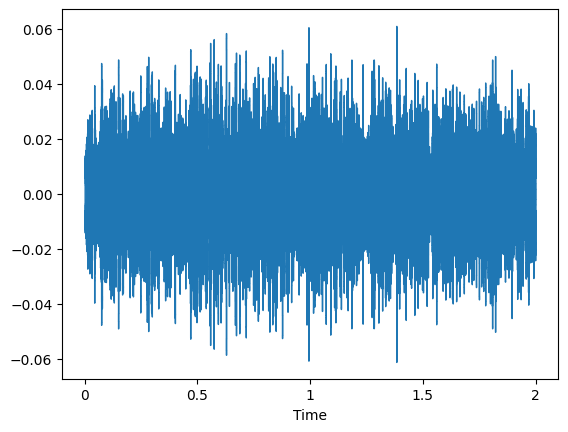

In [5]:
y, sr = librosa.load(path + "/train/441.wav")
mfccs = librosa.feature.mfcc(y=y, sr=sr)
feacture_vector = np.array(mfccs.mean(axis = 1))
print("Feacture Vector of the 441 sound :" , feacture_vector)
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

Feacture Vector of the 441 sound : [-645.6338     234.36342    144.91472     45.48093    -27.84984
  -56.00536    -42.734486    -9.896988    16.150446    20.436287
    5.5538597  -14.25443    -24.517353   -19.84695     -5.8041015
    6.6607847    9.520777     2.6417985   -7.3892975  -12.97015  ]


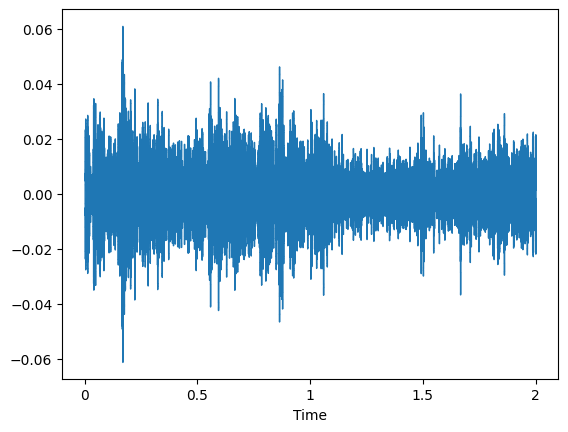

In [6]:
y, sr = librosa.load(path + "/test/441.wav")
mfccs = librosa.feature.mfcc(y=y, sr=sr)
feacture_vector = np.array(mfccs.mean(axis = 1))
print("Feacture Vector of the 441 sound :" , feacture_vector)
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

In [7]:
csv_path = path + "/train.csv"
labels = pd.read_csv(csv_path)
print(labels)
# print(labels["idx"][2])
# print(labels["class"][2])
# Convertimos la categoria a números. 1 equivale a RightWhale y 0 a NoWhale
labels["class"] = labels["class"].map({"RightWhale": 1, "NoWhale":0})
print(labels)
print(labels.shape)
print(labels.describe())


data_type = "/train"
my_directory = os.listdir(path + data_type)
for f in my_directory:
  id = f.split('.')[0]
  found_id = labels["idx"][int(id)]
  unknown_label = labels["class"][found_id]
  if unknown_label == "RightWhale":
    print("It is RightWhale")
  break


         idx       class
0          0     NoWhale
1          1  RightWhale
2          2     NoWhale
3          3     NoWhale
4          4     NoWhale
...      ...         ...
10929  10929  RightWhale
10930  10930     NoWhale
10931  10931     NoWhale
10932  10932  RightWhale
10933  10933     NoWhale

[10934 rows x 2 columns]
         idx  class
0          0      0
1          1      1
2          2      0
3          3      0
4          4      0
...      ...    ...
10929  10929      1
10930  10930      0
10931  10931      0
10932  10932      1
10933  10933      0

[10934 rows x 2 columns]
(10934, 2)
                idx         class
count  10934.000000  10934.000000
mean    5466.500000      0.500000
std     3156.518256      0.500023
min        0.000000      0.000000
25%     2733.250000      0.000000
50%     5466.500000      0.500000
75%     8199.750000      1.000000
max    10933.000000      1.000000


In [8]:
def encode(path, data_type = 'train'):
    data1 = []  # whale
    data2 = []  # no whale
    directory_1 = os.listdir(path +  data_type)
    #print(directory_1)
    for f in directory_1:
      y, sr = librosa.load(path + data_type + f)
      mfccs = librosa.feature.mfcc(y=y, sr=sr)
      fv = mfccs.mean(axis = 1)
      id = f.split('.')[0]
      found_id = labels["idx"][int(id)]
      unknown_label = labels["class"][found_id]
      if unknown_label == "RightWhale":
        data1.append(fv)
      else:   # NoWhale
        data2.append(fv)
    data = np.array(data1)
    temp = np.array(data2)
    # Important: Here the label is added; in this case, it is 1, but it may vary according to your requirements.
    data = np.insert(data, 0, 1, axis=1)
    # Important: Here the label is added; in this case, it is -1, but it may vary according to your requirements.
    temp = np.insert(temp, 0, -1, axis=1)

    data = np.concatenate((data, temp), axis=0)
    np.random.shuffle(data)
    y = data[:,0]
    x = data[:, 1:]
    return x, y


The code provided below accepts the path to your database directory and the type of dataset you wish to load as input. The default dataset is 'train', but you can also opt for 'test'. It returns the feature vectors for all the audio files, along with their labels (1, 0, -1) if you're employing SVM. Should you prefer, the labels can be adjusted to 1 or 0 for use with logistic regression.

In [9]:
import numpy as np
import os

def encode(path, data_type = '/train', labels_sorted = []):
  data = []
  labels = []
  directory_1 = os.listdir(path +  data_type)
  #print(directory_1)
  for f  in directory_1:
    y, sr = librosa.load(path +  data_type + "/" + f)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    fv = mfccs.mean(axis = 1)
    data.append(fv)
    if len(labels_sorted) > 0:
        labels.append(labels_sorted.iloc[int(f[:-4]), 1])
  data = np.array(data)
  if len(labels_sorted) > 0:
      data = np.insert(data, data.shape[1], labels, axis=1)
    
  np.random.shuffle(data)
  y = labels
  x = data[:, :-1] if len(labels_sorted) > 0 else data
  return x, y


# Data Train and Data Test

By this point, your team should already have the training and testing data fully prepared for use in your model. Therefore, your team should focus solely on running your models and achieving good results.

In [10]:
x_train, y_train = encode(path, "/train", labels)

In [11]:
def norm_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val)

x_train_norm = norm_data(x_train)

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def matriz_confusion(y_pred, Tipo):
 sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

# Model

----

## Decision Tree

In [35]:
# Write here your o yours models.
from DT_optimizado import DT
from sklearn.model_selection import train_test_split

modelo_DT = DT(max_depth=2)        # max_depth = 4 mejor score kaggle

X_train, X_test, y_train_split, y_test = train_test_split(x_train_norm, y_train, test_size=0.3, random_state=42)   # entrando con data pca

y_train_split = np.array(y_train_split)

In [36]:
modelo_DT.fit(X_train, y_train_split)

Accuracy:  0.5013715330691862


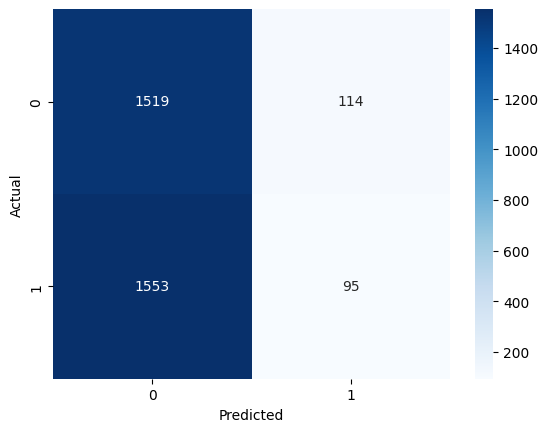

 My Model Metrics  
              precision    recall  f1-score   support

  RightWhale       0.49      0.93      0.65      1633
     NoWhale       0.45      0.06      0.10      1648

    accuracy                           0.49      3281
   macro avg       0.47      0.49      0.37      3281
weighted avg       0.47      0.49      0.37      3281



In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy_f = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy_f)

y_pred = modelo_DT.predict_2(X_test)
matriz_confusion(y_pred," My Model ")

report = classification_report(y_test, y_pred, target_names = ["RightWhale", "NoWhale"])
print(" My Model Metrics  ")
print(report)

# Test

Your model will have a predict function. It receives the x test data and returns a prediction, just as shown in the following code. This result will be used to create the confusion matrix as well as the metrics report



In [ ]:
x_test, y_test = encode(path, '/test')